<br>
<br>
<font size='6'><u><b>Our Vast Universe Probed with Big Data</b></u></font>
<br>

##### Written by Stephanie Juneau, NOAO, with contributions from Leah Fulmer & Gautham Narayan

This notebook is interactive, and we will use it to learn and explore the distribution of galaxies in the universe. We follow a similar approach as other notebooks you might have used, in particular the one written by Gautham Narayan.

Feel comfortable to ask questions as you go along!
___

# Table of Contents

* [How to Use This Notebook](#How-to-Use-This-Notebook)
* [Pre-Activity Setup](#Pre-Activity-Setup)
* [Activity 1: How Far Away are Galaxies?](#Activity-1:-How-Far-Away-are-Galaxies?)
    * [Step 1.1: Plot a Reference Spectrum](#Step-1.1:-Plot-a-Reference-Spectrum)
    * [Step 1.2: Plot a Galaxy Spectrum](#Step-1.2:-Plot-a-Galaxy-Spectrum)
    * [Step 1.3: Measure Redshifts](#Step-1.3:-Measure-Redshifts)
    * [Step 1.4: Mystery Galaxy](#Step-1.4:-Mystery-Galaxy)
    * [Step 1.5: Redshift Ruler](#Step-1.5:-Redshift-Ruler)
* [Activity 2: Look at the Position of Many Galaxies](#Activity-2:-Look-at-the-Position-of-Many-Galaxies)
    * [Step 2.1: Selecting Galaxies in a Region of the Sky](#Step-2.1:-Selecting-Galaxies-in-a-Region-of-the-Sky)
    * [Step 2.2: Adding the 3rd Dimension](#Step-2.2:-Adding-the-3rd-Dimension)
    * [Step 2.3: Zooming In and Zooming Out](#Step-2.3:-Zooming-In-and-Zooming-Out)
    * [Step 2.4: Plot Full Sample over Sky Projection](#Step-2.4:-Plot-Full-Sample-over-Sky-Projection)
___

# How to Use This Notebook

The webpage you are in is actually an app - much like the ones on your cellphone. This app consists of cells.

An *input* cell looks like a light grey box with an `In [ ]:` on its left. Input cells each contain code - instructions to make the computer do something.

To activate or select a cell, click anywhere inside of it.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents.</b></font>
</div>

In [1]:
# Text that follows a "#" is known as a comment.
# Comments do not affect your code in any way.
# You should always read the comments at the top of each cell you interact with.
# Comments will be used to describe what the cell's code is actually doing.

To execute or run a selected cell, hit `[Shift + Enter]` on your keyboard.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents. Then, run the cell.</b></font>
</div>

In [2]:
# Text that DOESN'T follow a "#" is considered code.
# Lines of code are instructions given to your computer.
# The line of code below is a "print" statement.
# A print statement literally prints out the text between its quotes.

print("Congrats! You have successfully run your first cell!")

Congrats! You have successfully run your first cell!


Running a cell creates an *output* directly below it. An output can be some text, a graph, an interactive slider, or even nothing at all! For that last case, you know you have run a cell when the `In [ ]:` becomes `In [#]:`, where "#" is any number.

You can learn more about how Jupyter notebooks work at https://try.jupyter.org/
___

# Pre-Activity Setup

In order for any of the activities to work properly, you must import the libraries needed for the code in this notebook.

<div class='alert alert-info'>
    <font size='3'><b>Select and run the cell below.</b></font>
</div>

In [3]:
# Here, you are importing the libraries needed for this notebook.
# These libraries set up the plotting environment in your browser.

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.path as mpath
from mpl_toolkits.mplot3d import Axes3D

from IPython.core.display import Image, Markdown, display
def printmd(string):
    display(Markdown('#### `'+string+'`'))

import ipywidgets as widgets

from astroML.datasets import (fetch_sdss_S82standards,
                              fetch_sdss_specgals,
                              fetch_sdss_spectrum,
                              fetch_vega_spectrum)
from astroML.plotting import MultiAxes

printmd('Done! You have successfully imported the libraries.')

#### `Done! You have successfully imported the libraries.`

___

# Activity 1: How Far Away are Galaxies?

In this activity, you will learn how astronomers measure distances to galaxies. You will get to compare galaxies to figure out which ones are closer or further away from us. You can then use this method for many more galaxies on your own as well!

As in the first notebook, we are going to use data from the [Sloan Digital Sky Survey (SDSS)](http://sdss.org). This project used a telescope at Apache Point in New Mexico to look at the northern sky.

<figure>
    <center>
        <br>
        <img src='https://apod.nasa.gov/apod/image/9806/sloan_fermilab_big.jpg', width='300'>
        <br>
        <figcaption>
            <font color='grey'>
                <b>Figure 1:</b>
                The Sloan Telescope at Apache Point, New Mexico.
                <br>
                <b>Image Credit:</b>
                SDSS Team, Fermilab Visual Media Services
            </font>
        </figcaption>
    </center>
</figure>

The Sloan survey team found millions of stars and galaxies, and made their big data set public. In this activity, we will retrieve and examine galaxy data!

So how did Sloan take spectra of millions of stars and galaxies? The team used metal plates like the one shown below, with a hundreds of holes aligned with the stars and galaxies to be observed. An optical fiber is placed in each hole in order to transfer the light to the instrument and camera. As you will see below, the data are identified by their *Plate* number, their *Fiber* number, and the date when they were obtained - the *MJD* ([Modified Julian Date](https://en.wikipedia.org/wiki/Julian_day)).

<figure>
    <center>
        <br>
        <img src='http://www.nature.com/polopoly_fs/7.2192.1325671958!/image/Dark-Energy.jpg_gen/derivatives/fullsize/Dark-Energy.jpg', width='300'>
        <br>
        <figcaption>
            <font color='grey'>
                <b>Figure 2:</b>
                Holes in aluminum plates let the light from stars and galaxies passed to an optical fiber to the instrument.
                <br>
                <b>Image Credit:</b>
                D. Long, SDSS-III
            </font>
        </figcaption>
    </center>
</figure>

<figure>
    <center>
        <br>
        <img src='http://newscenter.lbl.gov/wp-content/uploads/sites/2/2008/09/schlegel.jpg', width='300'>
        <br>
        <figcaption>
            <font color='grey'>
                <b>Figure 3:</b>
                David Schlegel, Principal Investigator of the BOSS survey (follow-up to SDSS), holding one fiber plug plate.
            </font>
        </figcaption>
    </center>
</figure>

There were thousands of plates used (~2500 for SDSS), each with 640 fibers, which together gives 1.6 million spectra (including galaxies, stars, and extra spectra on blank sky).
___

## Step 1.1: Plot a Reference Spectrum

A reference spectrum means that it is at redshift zero (not moving toward or away from us). In this case, the reference spectrum is that of a single star.

<div class='alert alert-info'>
    <h3 class='alert-heading'>Helpful Reminder(s)</h3>
    <ul>
        <li>Click anywhere inside of a cell to select it.</li>
        <li>Hit [Shift + Enter] to run a selected cell.</li>
    </ul>
</div>

<IPython.core.display.Javascript object>


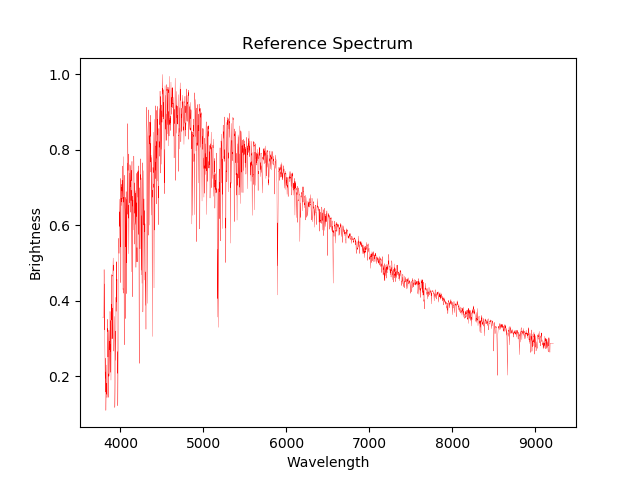

In [4]:
# Fetch single spectrum - Enter the same "Plate", "MJD" and "Fiber" numbers here
# Then hit Shift+Enter

plate = 396
mjd = 51816
fiber = 605
spec = fetch_sdss_spectrum(plate, mjd, fiber)

# now, we can plot the reference spectrum (at redshift=0)
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_title('Reference Spectrum')
ax.set_xlabel('Wavelength')
ax.set_ylabel('Brightness')
ax.plot(spec.wavelength(), spec.spectrum/spec.spectrum.max(), color='red', lw=0.2)
fig.show()

___

## Step 1.2: Plot a Galaxy Spectrum

Here, you will plot the spectrum of a galaxy. Notice if there are similarities and differences in its shape and lines relative to the reference spectrum.

<IPython.core.display.Javascript object>


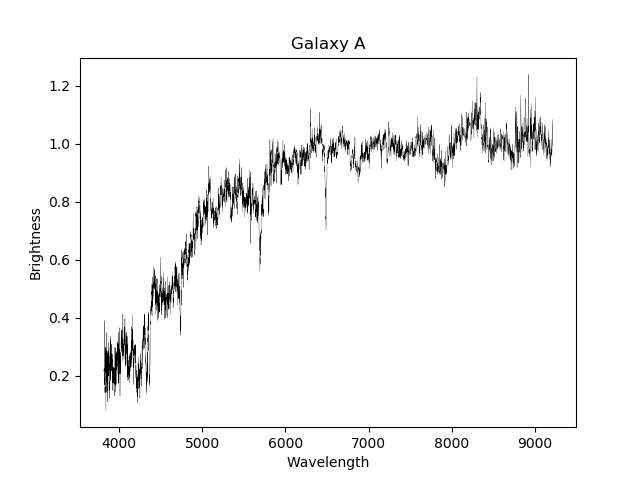

In [5]:
# Fetch the first galaxy spectrum
# Then hit Shift+Enter

plate = 2434
mjd = 53826
fiber = 359
spec1 = fetch_sdss_spectrum(plate, mjd, fiber)

# now, we can plot the reference spectrum (at redshift=0)
fig = plt.figure(2)
ax = fig.add_subplot(111)
ax.set_title('Galaxy A')
ax.set_xlabel('Wavelength')
ax.set_ylabel('Brightness')
ax.plot(spec1.wavelength(), spec1.spectrum/40., color='black', lw=0.2)
fig.show()

<div class='alert alert-success'>
    <h3 class='alert-heading'>Quick Question(s)</h3>
    <ul>
        <li>Do you notice differences between the shapes two spectra?</li>
        <li>Do you notice similar patterns in the line features (dips)?</li>
    </ul>
</div>

___

## Step 1.3: Measure Redshifts

The next step here is to overlay a reference spectrum (called a template) onto the galaxy spectra from above.

> <u><b>Remember:</b></u> A galaxy is a collection of billion of stars, so the shape of the spectrum is not identical to the reference spectrum of a single star. But because the stars have the same elements, notice similar "dips" in the spectra.

<IPython.core.display.Javascript object>


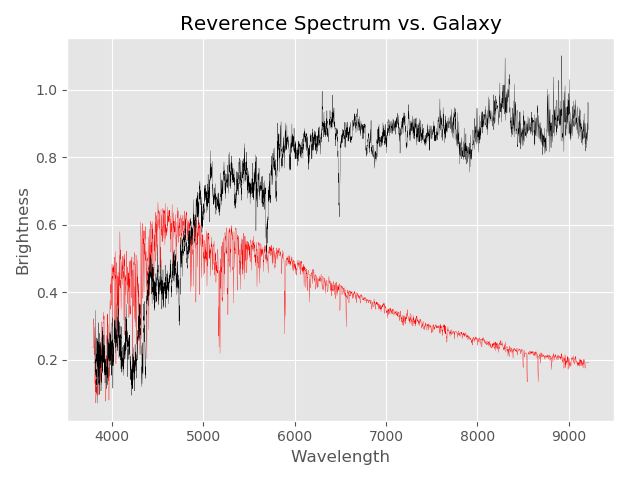

In [6]:
# redshift value (0 for a star, and upward for distant galaxies e.g.: 
# z = 0.01, 0.02, 0.05, ... 0.1, 0.2, ... 1.0)
# First run this cell with zero redshift, and then adjust the value.
    
z = 0

plt.style.use('ggplot')

# now, we can plot the reference spectrum (at redshift=0)

fig = plt.figure(3)
ax = fig.add_subplot(111)
ax.set_title('Reverence Spectrum vs. Galaxy')
ax.set_xlabel('Wavelength')
ax.set_ylabel('Brightness')
fig.tight_layout()
ln1, = ax.plot(spec.wavelength()*(1.+z), spec.spectrum/spec.spectrum.max()/1.5, color='red', lw=0.2)
ln2, = ax.plot(spec1.wavelength(), spec1.spectrum/45., color='black', lw=0.2)

def figure3a(z):
    ln1.set_xdata(spec.wavelength()*(1.+z))
    ax.relim()
    ax.autoscale_view()

def figure3b(c1, c2):
    ln1.set_color(c1)
    ln2.set_color(c2)

tab = widgets.Tab([
    widgets.interactive(
        figure3a,
        z = widgets.FloatSlider(
            description='Redshift:',
            value=0,
            min=0,
            max=0.5,
            step=0.01,
            layout=widgets.Layout(width='99%'))),
    widgets.interactive(
        figure3b,
        c1 = widgets.ColorPicker(
            description='Reference:',
            value='red'),
        c2 = widgets.ColorPicker(
            description='Galaxy:',
            value='black'))])
tab.set_title(0, 'Redshift')
tab.set_title(1, 'Color')
tab

<div class='alert alert-success'>
    <h3 class='alert-heading'>Quick Question(s)</h3>
    <ul>
        <li>Do you notice how the galaxy spectrum is shifted with respect to the reference spectrum?</li>
    </ul>
</div>

This is what we saw as the "redshift" due to the expansion of the universe, which causes galaxies to appear to recede away from us.
___

## Step 1.4: Mystery Galaxy

Each group will receive the information to fetch a different spectrum of a mystery galaxy. This information will be on a piece of paper and contains PLATE, MJD, FIBER and NORM numbers. Enter these numbers in the cell below to measure the redshift (like you did above) for a new galaxy. If you do not get a piece of paper, simply use the numbers that are pre-entered below.

<IPython.core.display.Javascript object>


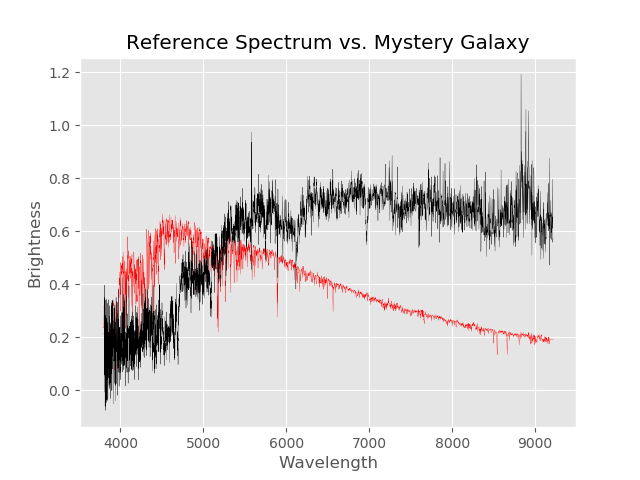

In [7]:
# Now we do it again for a NEW galaxy!

# Replace the plate, mjd, fiber and norm with the numbers you received.
# Then hit Shift+Enter

## Mystery galaxy
plate = 2121
mjd = 54180
fiber = 414
norm = 22.
spec2 = fetch_sdss_spectrum(plate, mjd, fiber)

# redshift value (0 for a star, and upward for distant galaxies e.g.: 
# z=0.01, 0.02, 0.05, ... 0.1, 0.2, 0.3, ... 1.0)
# First run this cell with zero redshift, and then adjust the value.
z = 0.0

# now, we can plot the reference spectrum (at redshift=0)
fig = plt.figure(4)
ax = fig.add_subplot(111)
ax.set_title('Reference Spectrum vs. Mystery Galaxy')
ax.set_xlabel('Wavelength')
ax.set_ylabel('Brightness')
ln1, = ax.plot(spec.wavelength()*(1.+z), spec.spectrum/spec.spectrum.max()/1.5, color='red', lw=0.2)
ln2, = ax.plot(spec2.wavelength(), spec2.spectrum/norm, color='black', lw=0.2)

def figure4a(galaxy):
    if galaxy == 'Mystery Galaxy 1': # Mystery Galaxy 1
        plate = 2121
        mjd = 54180
        fiber = 414
        norm = 22.

    if galaxy == 'Mystery Galaxy 2': # Mystery Galaxy 2
        plate = 1759
        mjd = 53081
        fiber = 126
        norm = 15.

    if galaxy == 'Mystery Galaxy 3': # Mystery Galaxy 3
        plate = 1839
        mjd = 53471
        fiber = 310
        norm = 20.

    if galaxy == 'Mystery Galaxy 4': # Mystery Galaxy 4
        plate = 2121
        mjd = 54180
        fiber = 523
        norm = 350.

    spec2 = fetch_sdss_spectrum(plate, mjd, fiber)
    
    ln2.set_xdata(spec2.wavelength())
    ln2.set_ydata(spec2.spectrum/norm)
    ax.relim()
    ax.autoscale_view()

def figure4b(z):
    ln1.set_xdata(spec.wavelength()*(1.+z))
    ax.relim()
    ax.autoscale_view()

def figure4c(c1, c2):
    ln1.set_color(c1)
    ln2.set_color(c2)

tab = widgets.Tab([
    widgets.interactive(
        figure4a,
        galaxy = widgets.ToggleButtons(
            options=['Mystery Galaxy 1', 'Mystery Galaxy 2', 'Mystery Galaxy 3', 'Mystery Galaxy 4'],
            description='Galaxy:')),
    widgets.interactive(
        figure4b,
        z = widgets.FloatSlider(
            description='Redshift:',
            value=0,
            min=0,
            max=0.5,
            step=0.01,
            layout=widgets.Layout(width='99%'))),
    widgets.interactive(
        figure4c,
        c1 = widgets.ColorPicker(
            description='Reference:',
            value='red'),
        c2 = widgets.ColorPicker(
            description='Galaxy:',
            value='black'))])
tab.set_title(0, 'Mystery Galaxy')
tab.set_title(1, 'Redshift')
tab.set_title(2, 'Color')
tab

<div class='alert alert-warning'>
    <h3 class='alert-heading'>Discussion Question(s)</h3>
    <ul>
        <li>Which galaxy is closer to us and why?</li>
    </ul>
</div>

Now, let's check the redshift and learn more information about those two galaxies. [Click this link.](http://cas.sdss.org/dr14/en/tools/explore/Summary.aspx) Click on "Search" on the left hand side menu bar, and then enter the "Plate", "Fiber" and "MJD" for one galaxy at a time, and hit "Go". If you click on the image, you can move around, zoom in and out - it's like Google Maps for the night sky!
___

## Step 1.5: Redshift Ruler

Each group had a different mystery galaxy. Let's see how far away they are compared with each other by placing them on the "redshift ruler" on the white board at the front of the room (if applicable).

### What's next?

Well done! You have measured redshifts for two galaxies, which is how astronomers determine distances to galaxies. Remember, the further away a galaxy is from us, the faster is seems to be moving away from us, and the more its light (spectrum) is redshifted! That's because the universe is expanding.

Next, let's see what we can learn if we apply this information to many galaxies. Onward to exploring our vast universe!
___

# Activity 2: Look at the Position of Many Galaxies

Similarly to using coordinates of latitude and longitude, the coordinates on the sky are defined onto a sphere. They are called RA (for Right Ascension) and Dec (for Declination). There are two illustrations below of these coordinate systems.

<figure>
    <center>
        <br>
        <img src='http://voyages.sdss.org/wp-content/uploads/2015/10/pre-flight-celestial-sphere.jpg', width='300'>
        <br>
        <figcaption>
            <font color='grey'>
                <b>Figure 4:</b>
                Illustration of the celestial coordinate system with RA and Dec. You can read <a href='http://dev.skyserver.sdss3.org/voyages/pre-flight/ra-and-dec.aspx'>here</a> for an explanation by the SDSS team.
            </font>
        </figcaption>
    </center>
</figure>

<figure>
    <center>
        <br>
        <img src='https://upload.wikimedia.org/wikipedia/commons/9/98/Ra_and_dec_on_celestial_sphere.png', width='300'>
        <br>
        <figcaption>
            <font color='grey'>
                <b>Figure 5:</b>
                Illustration of the celestial coordinate system with RA and Dec. You can read on Wikipedia about <a href='https://en.wikipedia.org/wiki/Right_ascension'>Right Ascension</a> and <a href='https://en.wikipedia.org/wiki/Declination'>Declination</a>.
            </font>
        </figcaption>
    </center>
</figure>

___

## Step 2.1: Selecting Galaxies in a Region of the Sky

Next, we will fetch the positions of galaxies on the sky, and plot their RA and Dec coordinates. Run the cells below to actually fetch the galaxy sample and plot their positions on the sky.

<div class='alert alert-info'>
    <h3 class='alert-heading'>Helpful Reminder(s)</h3>
    <ul>
        <li>Click anywhere inside of a cell to select it.</li>
        <li>Hit [Shift + Enter] to run a selected cell.</li>
    </ul>
</div>

Done retrieving the galaxy sample
 
Range for RA values
   0.0006706232093165454 359.99737558256095
Range for DEC values
   -11.252827038865547 70.28739962843254
 
Range for RA values after conversion
   -179.99932937679068 179.99737558256095


<IPython.core.display.Javascript object>


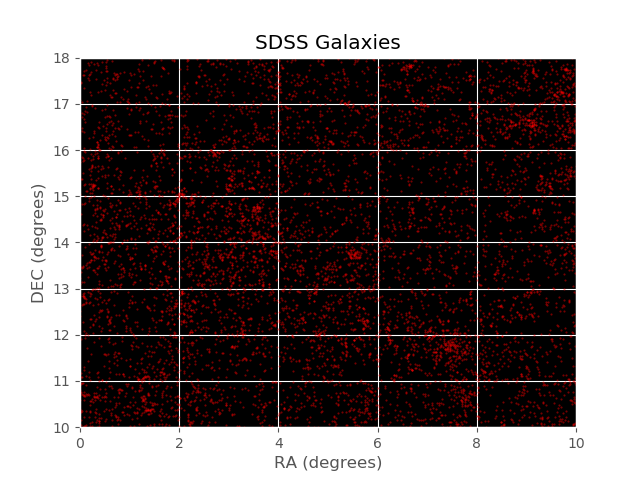

In [8]:
# Fetch the sample from the Sloan data
data = fetch_sdss_specgals()
print('Done retrieving the galaxy sample')

# Define the coordinate variables for plotting
RA = data['ra']
DEC = data['dec']

print(' ')
print('Range for RA values')
print('  ',np.amin(RA),np.amax(RA))
print('Range for DEC values')
print('  ',np.amin(DEC),np.amax(DEC))
print(' ')

# convert RA range to [-180,+180] instead of [0,360]
RA -= 180

print('Range for RA values after conversion')
print('  ',np.amin(RA),np.amax(RA))

#plot the RA/DEC positions
fig = plt.figure(5)
ax = fig.add_subplot(111, fc='black')
ax.set_title('SDSS Galaxies')
ax.set_xlabel('RA (degrees)')
ax.set_ylabel('DEC (degrees)')
ax.set_xlim(0,10)#range for the x axis (horizontal) and y axis (vertical)
ax.set_ylim(10,18)
ln, = ax.plot(RA, DEC, c='red', marker='.', ms=1, ls='', alpha=0.5)
#fig.show()

___

## Step 2.2: Adding the 3rd Dimension

We saw before that in order to know the full distribution in 3D, we need to know how far away the galaxies are located. Here, we will add the information from the redshift.

> <u><b>Remember:</b></u> The larger the redshift, the further away the galaxy!

First, we will plot all galaxies in red, and show galaxies that have approximately the same redshift in black. In this first example, we will select for values of redshift between $z=0.10$ and $z=0.12$. This is done by computing galaxies in a window of $-0.01$ and $+0.1$ around $z=0.11$ (since $0.11-0.01=0.10$ and $0.11+0.01=0.12$). We call this an interval of redshift.

Done retrieving the galaxy sample


<IPython.core.display.Javascript object>


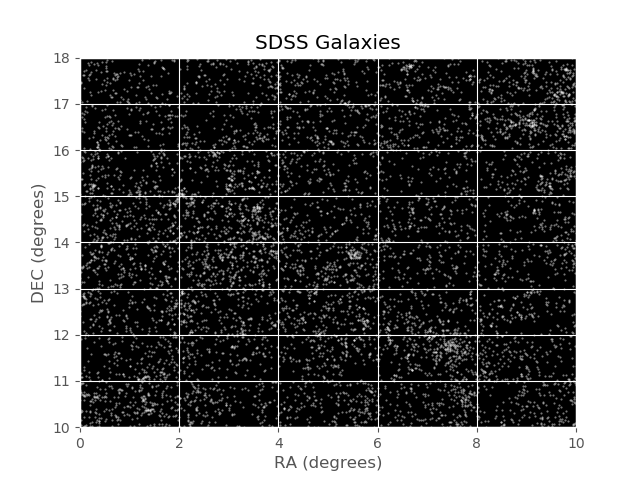

<IPython.core.display.Javascript object>


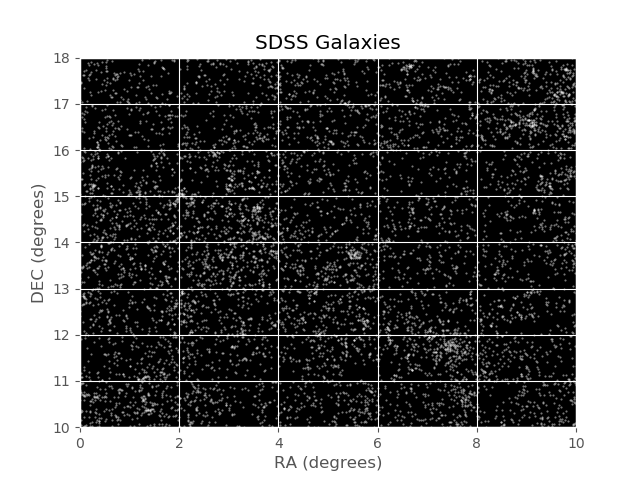

In [9]:
#Fetch the sample from the Sloan data
data = fetch_sdss_specgals()
print('Done retrieving the galaxy sample')

#define the variables for plotting
RA = data['ra']
DEC = data['dec']

# convert RA range to [-180,+180] instead of [0,360]
RA -= 180

#define redshift variable z
z = data['z']

#pick a redshift range to highlight in a different color
rz = np.where(np.absolute(z-0.08)<0.01)

#plot the RA/DEC positions
fig = plt.figure(6)
ax = fig.add_subplot(111, fc='black')
ax.set_title('SDSS Galaxies')
ax.set_xlabel('RA (degrees)')
ax.set_ylabel('DEC (degrees)')
ax.set_xlim(0,10) #range for the x axis (horizontal) and y axis (vertical)
ax.set_ylim(10,18)
ln1, = ax.plot(RA, DEC, c='white', marker='.', ms=1, ls='', alpha=0.5)
ln2, = ax.plot(RA[rz], DEC[rz], c='red', marker='.', ms=2, ls='')  #rz selected galaxies

def figure6(zz):
    rz = np.where(np.absolute(z-zz) < 0.01)
    ln2.set_data([RA[rz], DEC[rz]])

tab = widgets.Tab([
    widgets.interactive(
        figure6,
        zz = widgets.FloatSlider(
            description='Redshift:',
            value=0,
            min=0,
            max=1,
            step=0.01,
            layout=widgets.Layout(width='99%')))])
tab.set_title(0, 'Redshift')
tab
display(fig, tab)

Now, instead of showing just one interval of redshift in black, we will show the redshift of each galaxy color-coded. Each galaxy is shown with a dot, and each dot will have a color corresponding to the redshift: purple/blue colors mean a low redshift like between $0$-$0.05$, then green/yellow mean slightly higher redshift like $0.1$, and so on until the higher redshift shown here of $0.2$ in red. Remember that this means that points with exactly the same color are at the same distance from us!

<IPython.core.display.Javascript object>


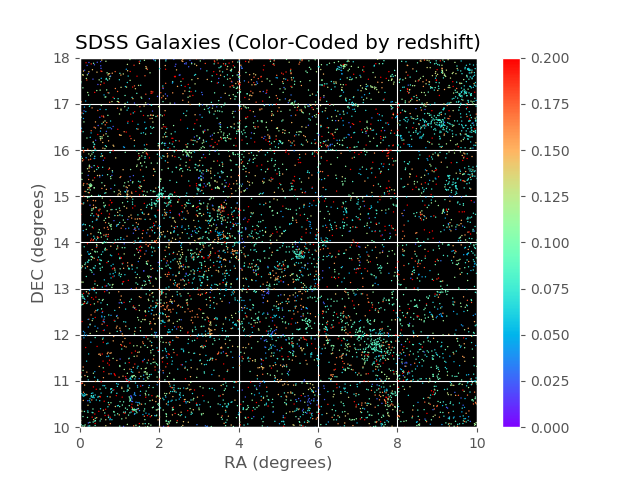

In [10]:
#Fetch the sample from the Sloan data
data = fetch_sdss_specgals()

#define the variables for plotting
RA = data['ra']
DEC = data['dec']

# convert RA range to [-180,+180] instead of [0,360]
RA -= 180

#plot the RA/DEC positions

fig = plt.figure(7)
ax = fig.add_subplot(111, fc='black')
ax.set_title('SDSS Galaxies (Color-Coded by redshift)')
ax.set_xlabel('RA (degrees)') # Plot labels for the title and both horizontal (x) and vertical (y) axes
ax.set_ylabel('DEC (degrees)')
ax.set_xlim(0,10) #range for the x axis (horizontal) and y axis (vertical)
ax.set_ylim(10,18)
ln = ax.scatter(RA, DEC, s=1, c=data['z'], lw=0, cmap=cm.rainbow, vmin=0, vmax=0.2)
fig.colorbar(ln) #color bar

# Add a rextangle to show where we will zoom in next:
# We give the (x,y) of 4 corners + repeat first corner to close the rectangle
#plt.plot([4,4,6,6,4], [11,13,13,11,11], color='black', linewidth=2)

Next, you will make a 3D version of the above 2D plot (same dots but in 3D).

<IPython.core.display.Javascript object>


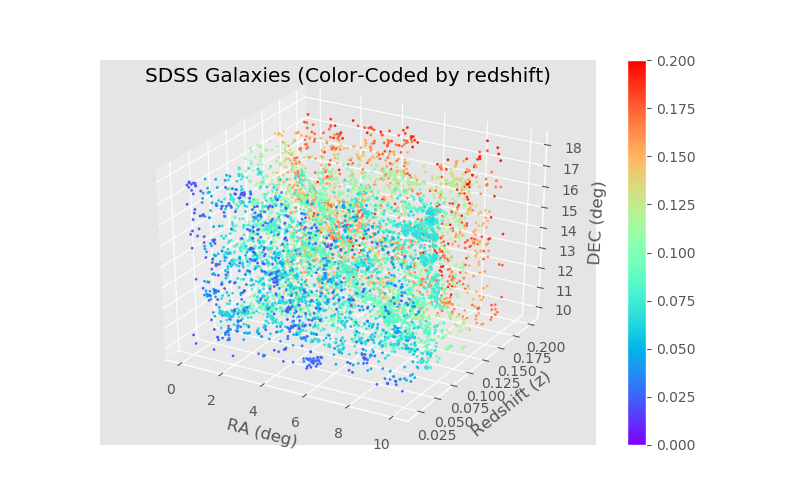

In [11]:
#3D Plotting

#Fetch the sample from the Sloan data
data = fetch_sdss_specgals()

#define the variables for plotting
RA = data['ra']
RA -= 180 # convert RA range to [-180,+180] instead of [0,360]
DEC = data['dec']
z = data['z']

# Setting ranges
limits = np.logical_and(np.logical_and(np.logical_and(RA<10, RA>0), np.logical_and(DEC>10, DEC<18)), np.logical_and(z>0.0, z<0.2))

RA_new = RA[limits]
DEC_new = DEC[limits]

#define redshift variable z

z_new = z[limits]

#plot the RA/DEC positions
fig = plt.figure(8, figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(RA_new, z_new, DEC_new, zdir='z', s=2.5, c=z_new, cmap=cm.rainbow, vmin=0, vmax=0.2, depthshade=True)
fig.colorbar(p)

# Plot labels for the title and both horizontal (x) and vertical (y) axes
ax.set_title('SDSS Galaxies (Color-Coded by redshift)')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Redshift (z)')
ax.set_zlabel('DEC (deg)')

fig.show()

The color bar to the right-hand side shows the correspondence between color and redshift. As mentioned before, points with exactly the same color are at the same distance from us. Purple points are the closest to us, then blue, aqua, green and so on. Think about which galaxies/colors are near and which galaxies/colors are far.

<div class='alert alert-success'>
    <h3 class='alert-heading'>Quick Question(s)</h3>
    <ul>
        <li>Can you use this information to imagine the distribution of galaxies in 3D?</li>
        <li>Do you notice any structure together at the same distance from us?</li>
    </ul>
</div>

The black rectangle in the figure shows where we will zoom in during the next exercise below.
___

## Step 2.3: Zooming In and Zooming Out

Now, we will repeat the plots from Step 2.2 above, but with a zoom on a smaller region ("zooming in"), and then over a larger region ("zooming out").

<IPython.core.display.Javascript object>


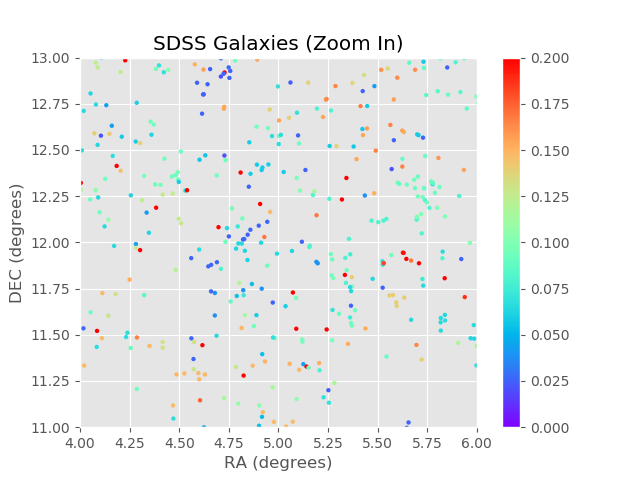

-------------------------------------
Number of galaxies in the plot above:
   774


In [12]:
# ZOOMING IN

#Fetch the sample from the Sloan data
data = fetch_sdss_specgals()

#define the variables for plotting
RA = data['ra']
DEC = data['dec']

# convert RA range to [-180,+180] instead of [0,360]
RA -= 180

#plot the RA/DEC positions
plt.figure(9)
s=10.0   #symbol size
plt.scatter(RA, DEC,s=s,c=data['z'], lw=0,cmap=cm.rainbow,
            vmin=0, vmax=0.2)
plt.title('SDSS Galaxies (Zoom In)')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')

#range for the x axis (horizontal) and y axis (vertical)
plt.xlim(4,6)
plt.ylim(11,13)

#color bar
plt.colorbar()

# Count how many galaxies are within the plot
points = np.column_stack([RA, DEC])
verts = np.array([[4,4,6,6], [11,13,13,11]]).T
path = mpath.Path(verts)
points_inside = points[path.contains_points(points)]
print('-------------------------------------')
print('Number of galaxies in the plot above:')
print('  ',np.count_nonzero(points_inside))

Next, you will make a 3D version of the above 2D plot (same dots but in 3D).

<IPython.core.display.Javascript object>


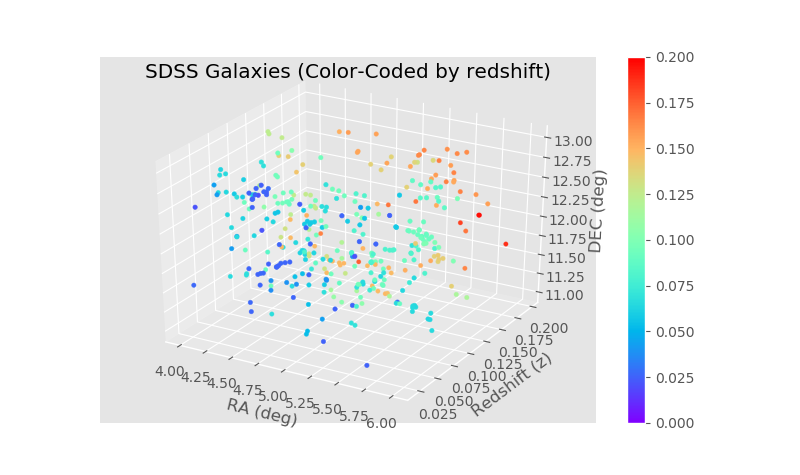

Text(0.5,0,'DEC (deg)')

In [13]:
#3D Plotting

#Fetch the sample from the Sloan data
data = fetch_sdss_specgals()

#define the variables for plotting
RA = data['ra']
RA -= 180 # convert RA range to [-180,+180] instead of [0,360]
DEC = data['dec']
z = data['z']

# Setting ranges
limits = np.logical_and(np.logical_and(np.logical_and(RA<6, RA>4), np.logical_and(DEC>11, DEC<13)), np.logical_and(z>0.0, z<0.2))

RA_new = RA[limits]
DEC_new = DEC[limits]

#define redshift variable z

z_new = z[limits]

#plot the RA/DEC positions
fig = plt.figure(10, figsize=(8,4.75))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(RA_new, z_new, DEC_new, zdir='z', s=10, c=z_new, cmap=cm.rainbow, vmin=0, vmax=0.2, depthshade=True)
fig.colorbar(p)

# Plot labels for the title and both horizontal (x) and vertical (y) axes
plt.title('SDSS Galaxies (Color-Coded by redshift)')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Redshift (z)')
ax.set_zlabel('DEC (deg)')

<div class='alert alert-success'>
    <h3 class='alert-heading'>Quick Question(s)</h3>
    <ul>
        <li>Do you see any interesting galaxy structures?</li>
        <li>What galaxy structures are closer/further from you?</li>
    </ul>
</div>

Now, let's step back and plot galaxies over a large region of the sky!

<IPython.core.display.Javascript object>


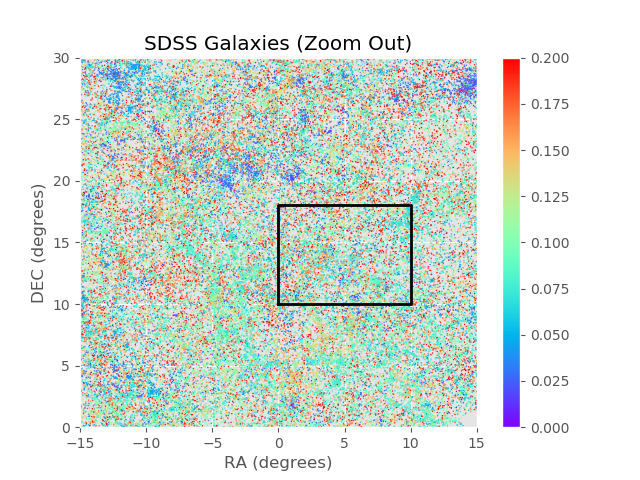

-------------------------------------
Number of galaxies in the plot above:
   151780


In [14]:
# ZOOMING OUT

#Fetch the sample from the Sloan data
data = fetch_sdss_specgals()

#define the variables for plotting
RA = data['ra']
DEC = data['dec']

# convert RA range to [-180,+180] instead of [0,360]
RA -= 180

#plot the RA/DEC positions
plt.figure(11)
s=1.0   #symbol size
plt.scatter(RA, DEC,s=s,c=data['z'], lw=0,cmap=cm.rainbow,
            vmin=0, vmax=0.2)

# Add a rextangle where we zoomed in before:
# We give the (x,y) of 4 corners + repeat first corner to close the rectangle
#plt.plot([4,4,6,6,4], [11,13,13,11,11], color='black', linewidth=1)

# Add original rectangle (before zooming in)
plt.plot([0,0,10,10,0], [10,18,18,10,10], color='black', linewidth=2)


# Plot labels for the title and both horizontal (x) and vertical (y) axes
plt.title('SDSS Galaxies (Zoom Out)')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')

#range for the x axis (horizontal) and y axis (vertical)
plt.xlim(-15,15)
plt.ylim(0,30)

#color bar
plt.colorbar()

# Count how many galaxies are within the plot
points = np.column_stack([RA, DEC])
verts = np.array([[-15,-15,15,15], [0,30,30,0]]).T
path = mpath.Path(verts)
points_inside = points[path.contains_points(points)]
print('-------------------------------------')
print('Number of galaxies in the plot above:')
print('  ',np.count_nonzero(points_inside))

The color bar to the right-hand side shows the correspondence between color and redshift. The black rectangle shows the region from the previous plot ("Zoomed In"). You can compare the size of the two regions directly.

<div class='alert alert-danger'>
    <h3 class='alert-heading'>Concluding Question(s)</h3>
    <ol>
        <li>How many times more galaxies are in the large (zoomed out) view relative to the small (zoomed in) view?</li>
        <li>How many times can you fit the small region within the large region? (Hint: compute the size from the axes)</li>
        <li>Are those two numbers above the same? What does it mean?</li>
        <li>What do you see now on the zoomed out view?</li>
        <li>Are those structures smaller or larger?</li>
    </ol>
</div>

___

## Step 2.4: Plot Full Sample over Sky Projection

Below, we will again plot the positions of galaxies, and include the information on redshift as the color (but with a different color scheme).

The difference with the steps above is that we will now plot the sample of galaxies over the full sky. The SDSS survey does not cover the full sky, so we will see what we call the "footprint" of the survey. This means the regions of the sky where the telescope was pointed to gather images and spectra.

<IPython.core.display.Javascript object>


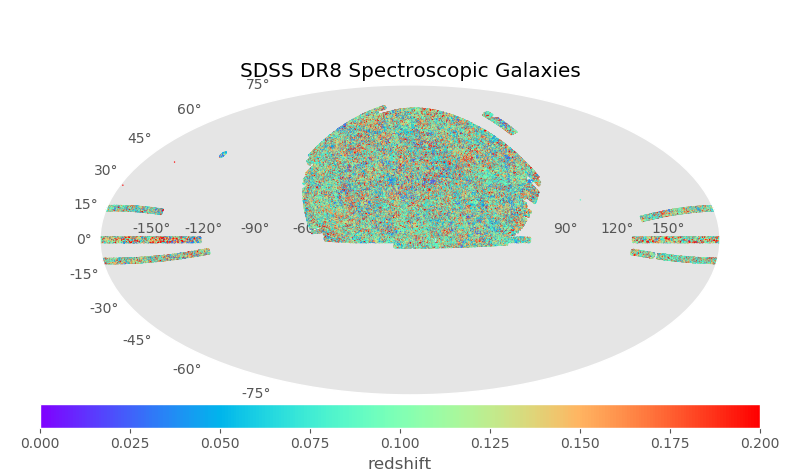

In [15]:
#------------------------------------------------------------
# plot the RA/DEC in an area-preserving projection

#Actually fetch the sample from the Sloan data
data = fetch_sdss_specgals()

# Define coordinate variables
RA = data['ra']
DEC = data['dec']

# convert coordinates to degrees
RA -= 180
RA *= np.pi / 180
DEC *= np.pi / 180

# keep galaxies in a selected area
#rkeep = np.where(RA between [-30,0] and DEC between [15,30])

fig = plt.figure(12, figsize=(8,4.75))
ax = fig.add_subplot(111, projection='mollweide')

ax.grid()
plt.scatter(RA, DEC, s=1, lw=0, c=data['z'], cmap=cm.rainbow,
            vmin=0, vmax=0.2)

plt.title('SDSS DR8 Spectroscopic Galaxies')
cb = plt.colorbar(cax=plt.axes([0.05, 0.1, 0.9, 0.05]),
                  orientation='horizontal',
                  ticks=np.linspace(0, 0.2, 9))
cb.set_label('redshift')

> <u><b>Hint:</b></u> for more color maps, you can look at this reference <a href=http://matplotlib.org/examples/color/colormaps_reference.html>page</a>. For example, you can replace "rainbow" with "autumn_r".